In [130]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Load the cleaned CSV
df = pd.read_csv("cleaned_data/happiness_cleaned.csv")

# View structure
df.head()




,country,region,year,happiness_score,gdp,social_support,life_expectancy,freedom,corruption,generosity
0,Switzerland,Western Europe,2015,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,Western Europe,2015,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,Western Europe,2015,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,Western Europe,2015,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,North America,2015,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [173]:
df

,country,region,year,happiness_score,gdp,social_support,life_expectancy,freedom,corruption,generosity,happiness_level
0,Switzerland,Western Europe,2015,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,Happy
1,Iceland,Western Europe,2015,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,Happy
2,Denmark,Western Europe,2015,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,Happy
3,Norway,Western Europe,2015,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,Happy
4,Canada,North America,2015,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,Happy
...,...,...,...,...,...,...,...,...,...,...,...
777,Rwanda,Unknown,2019,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,Unhappy
778,Tanzania,Unknown,2019,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,Unhappy
779,Afghanistan,Unknown,2019,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,Unhappy
780,Central African Republic,Unknown,2019,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,Unhappy


In [131]:
# Check data types
print(df.dtypes)

# Rename columns for consistency
df.columns = df.columns.str.lower().str.strip()

# Confirm no missing values
print(df.isnull().sum())

country             object
region              object
year                 int64
happiness_score    float64
gdp                float64
social_support     float64
life_expectancy    float64
freedom            float64
corruption         float64
generosity         float64
dtype: object
country            0
region             0
year               0
happiness_score    0
gdp                0
social_support     0
life_expectancy    0
freedom            0
corruption         0
generosity         0
dtype: int64


<Axes: title={'center': 'Average Happiness Over Years'}, xlabel='year'>

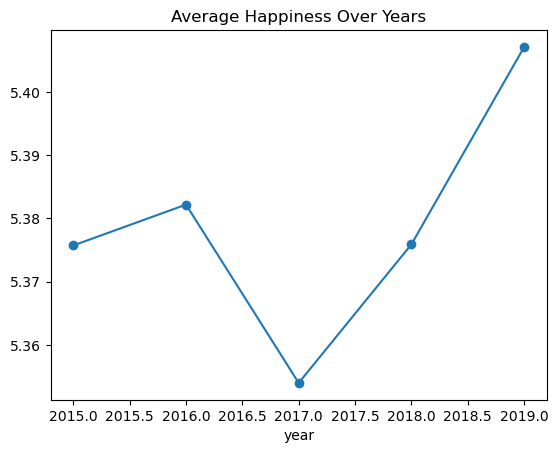

In [132]:
#Average Happiness by Year
df.groupby("year")["happiness_score"].mean().plot(marker='o', title='Average Happiness Over Years')


<Axes: title={'center': 'Top 10 Happiest Countries (2015–2019)'}, xlabel='country'>

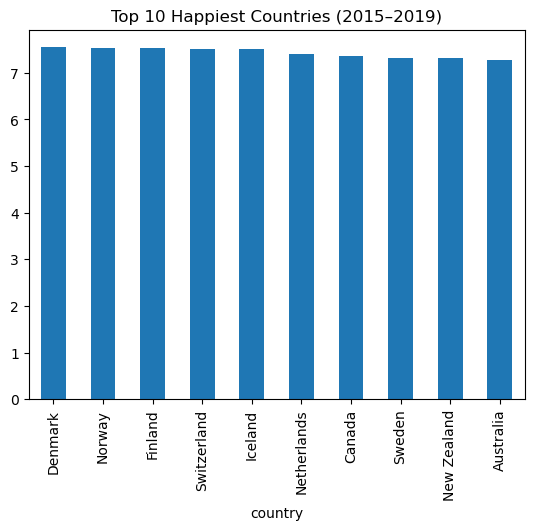

In [116]:
# Top 10 Happiest Countries (All Years)
top_happy = df.groupby("country")["happiness_score"].mean().sort_values(ascending=False).head(10)
top_happy.plot(kind='bar',title='Top 10 Happiest Countries (2015–2019)')


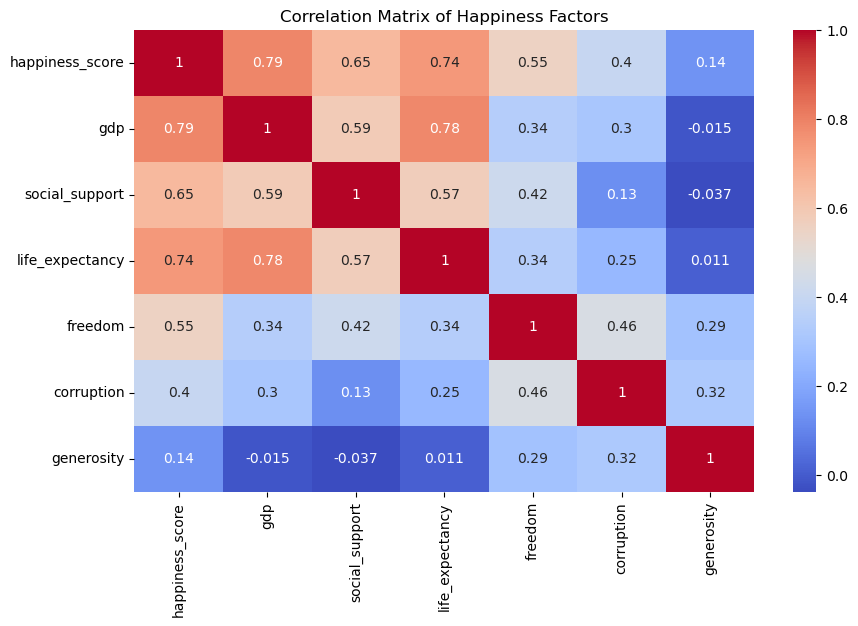

In [117]:
#Correlation Analysis
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
numeric_cols = ['happiness_score', 'gdp', 'social_support', 'life_expectancy', 'freedom', 'corruption', 'generosity']
corr = df[numeric_cols].corr()

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Happiness Factors")
plt.show()



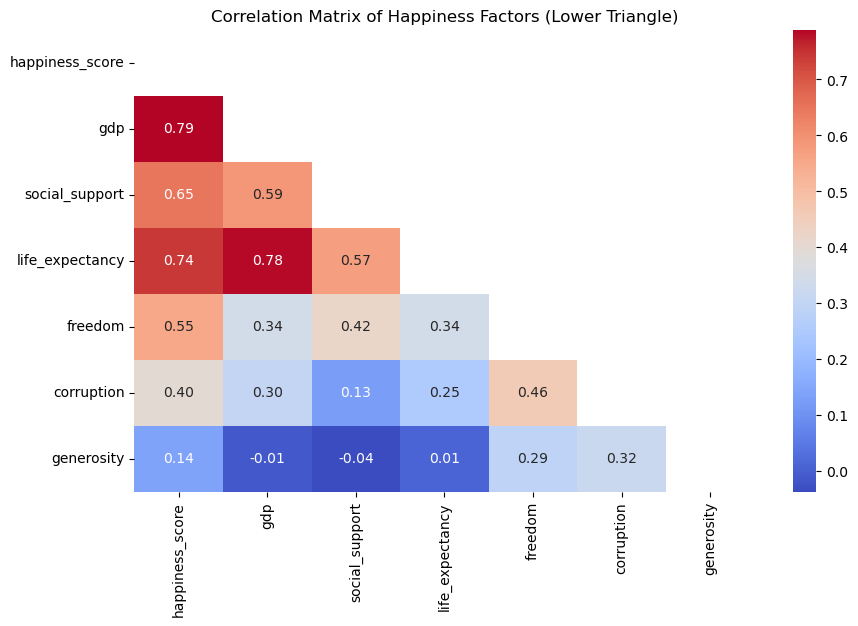

In [162]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
numeric_cols = ['happiness_score', 'gdp', 'social_support', 'life_expectancy', 'freedom', 'corruption', 'generosity']
corr = df[numeric_cols].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Heatmap with mask
plt.figure(figsize=(10,6))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Happiness Factors (Lower Triangle)")
plt.show()



<Axes: title={'center': 'Average Happiness Score by Region'}, ylabel='region'>

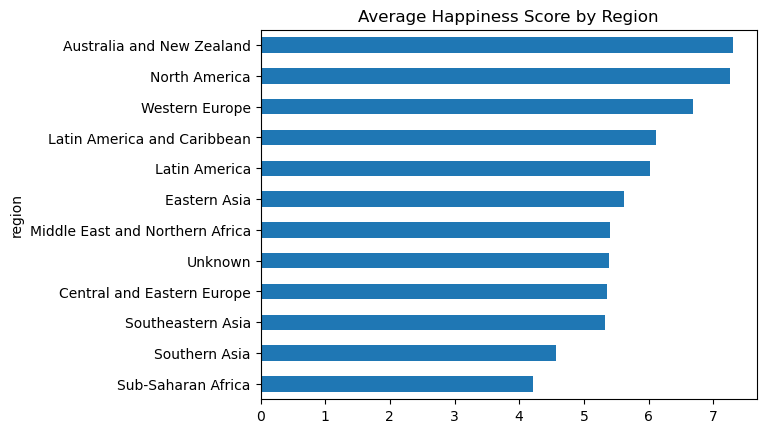

In [118]:
#Region-Level Analysis
# Average happiness by region
region_avg = df.groupby("region")["happiness_score"].mean().sort_values()
region_avg.plot(kind='barh', title="Average Happiness Score by Region")


In [163]:
#Predicting Happiness
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df[['gdp', 'social_support', 'life_expectancy', 'freedom', 'corruption', 'generosity']]
y = df['happiness_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression().fit(X_train, y_train)

print("R² score:", model.score(X_test, y_test))



R² score: 0.7290578060926065


<Axes: title={'center': 'Top 10 Least Happiest Countries (2015–2019)'}, xlabel='country'>

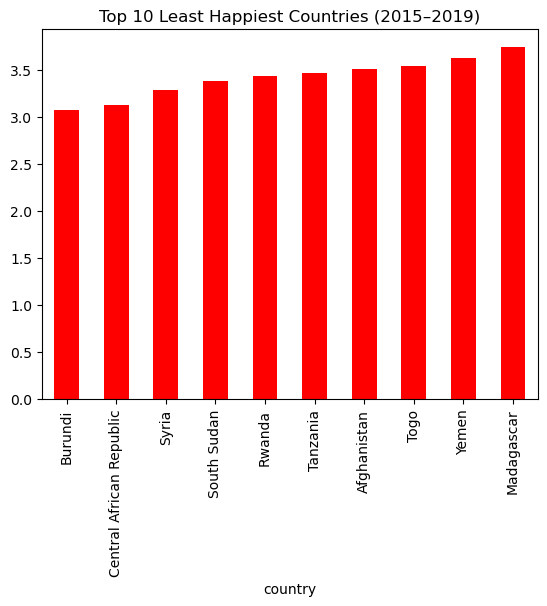

In [120]:

# Top 10 Least Happiest Countries (All Years)
top_happy = df.groupby("country")["happiness_score"].mean().sort_values(ascending=True).head(10)
top_happy.plot(kind='bar', color='red', title='Top 10 Least Happiest Countries (2015–2019)')



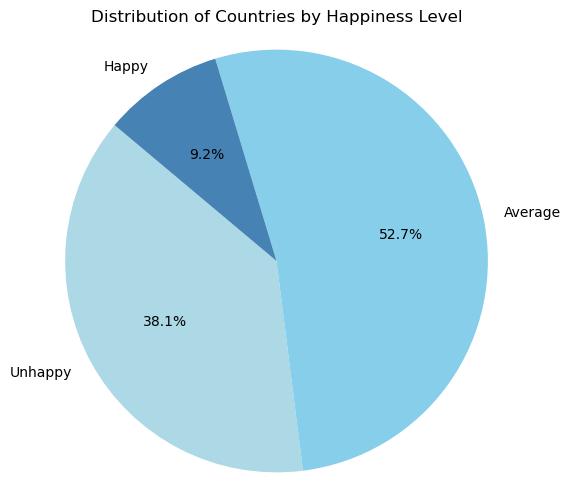

In [143]:
import pandas as pd
import matplotlib.pyplot as plt

# Define bins and labels
bins = [0, 5, 7, 10]
labels = ['Unhappy', 'Average', 'Happy']

# Create a new column with binned happiness
df['happiness_level'] = pd.cut(df['happiness_score'], bins=bins, labels=labels)

# Calculate percentage
percentage_data = df['happiness_level'].value_counts(normalize=True).sort_index() * 100

# Plot pie chart
colors = ['#add8e6', '#87ceeb', '#4682b4']  # Light to medium blue shades

plt.figure(figsize=(6, 6))
plt.pie(
    percentage_data,
    labels=percentage_data.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)

plt.title('Distribution of Countries by Happiness Level')
plt.axis('equal')  # Makes the pie chart a circle
plt.show()


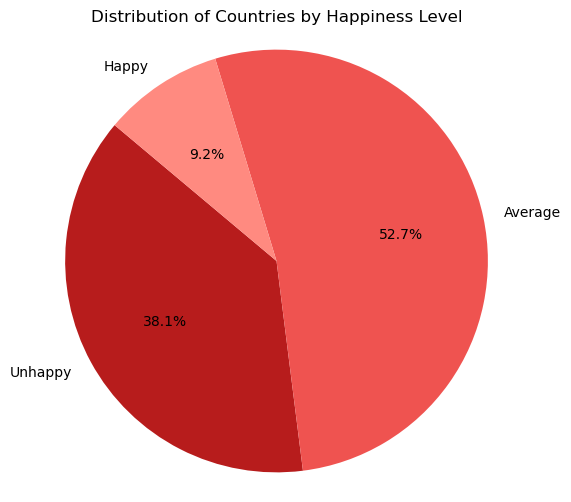

In [122]:
import pandas as pd
import matplotlib.pyplot as plt

bins = [0, 5, 7, 10]
labels = ['Unhappy', 'Average', 'Happy']

# Replace 'happiness_score' with the actual column name you have
df['happiness_level'] = pd.cut(df['happiness_score'], bins=bins, labels=labels)

percentage_data = df['happiness_level'].value_counts(normalize=True).sort_index() * 100

colors = ['#b71c1c', '#ef5350', '#ff8a80']

plt.figure(figsize=(6, 6))
plt.pie(
    percentage_data,
    labels=percentage_data.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)

plt.title('Distribution of Countries by Happiness Level')
plt.axis('equal')
plt.show()


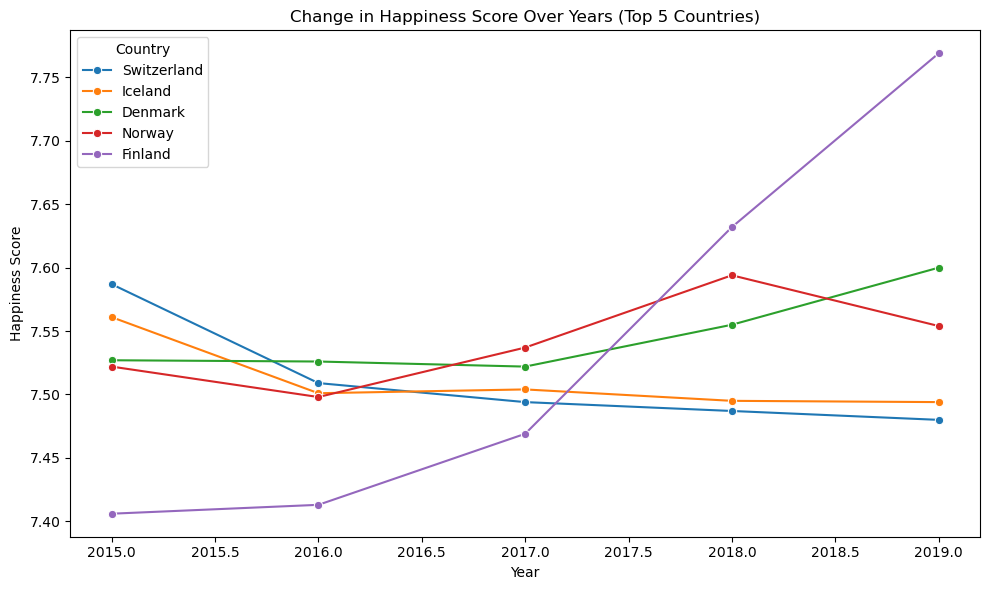

In [168]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_top5, x='year', y='happiness_score', hue='country', marker='o')
plt.title("Change in Happiness Score Over Years (Top 5 Countries)")
plt.xlabel("Year")
plt.ylabel("Happiness Score")
plt.legend(title='Country')
plt.tight_layout()
plt.show()


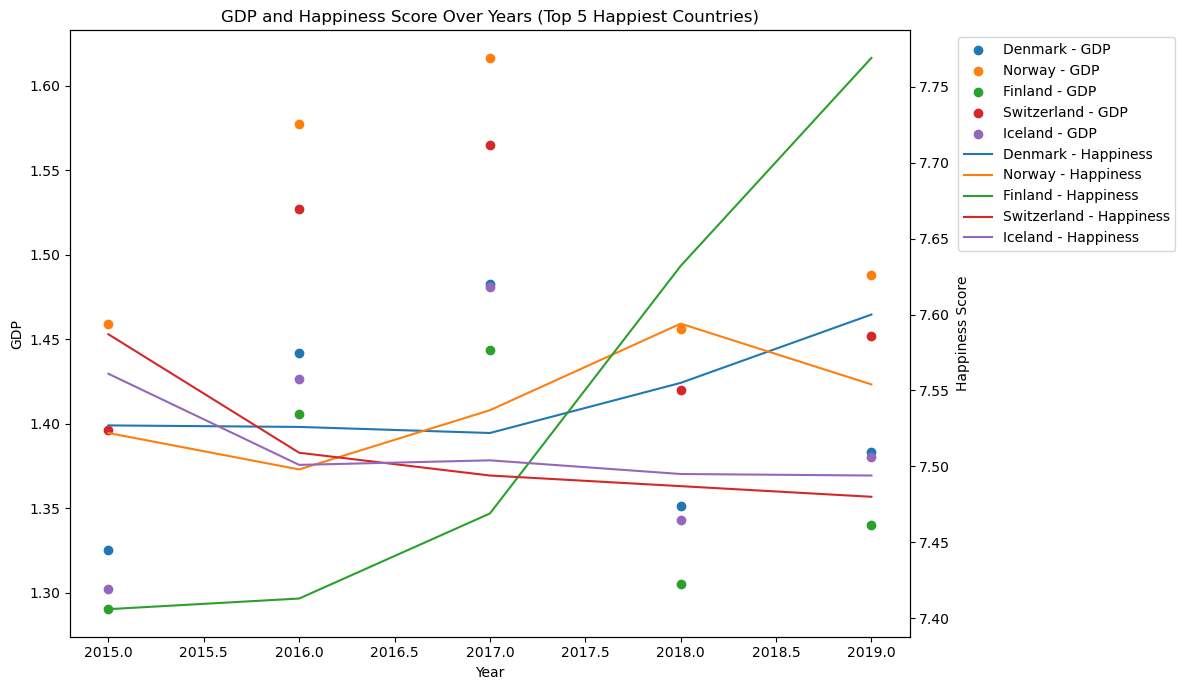

In [222]:
import matplotlib.pyplot as plt

# Step 1: Filter top 5 countries
top_5_countries = df.groupby('country')['happiness_score'].mean().nlargest(5).index
df_top5 = df[df['country'].isin(top_5_countries)]

# Step 2: Aggregate data by year and country for smoother lines (mean)
df_agg = df_top5.groupby(['year', 'country'])[['gdp', 'happiness_score']].mean().reset_index()

# Step 3: Plot dual-axis for each country separately (or combined if preferred)

fig, ax1 = plt.subplots(figsize=(12, 7))

colors = plt.cm.tab10.colors  # Up to 10 distinct colors


for i, country in enumerate(top_5_countries):
    country_data = df_agg[df_agg['country'] == country]
    ax1.scatter(country_data['year'], country_data['gdp'], color=colors[i], label=f'{country} - GDP')



#for i, country in enumerate(top_5_countries):
 #   country_data = df_agg[df_agg['country'] == country]
  #  ax1.plot(country_data['year'], country_data['gdp'], color=colors[i], label=f'{country} GDP', marker='o')

    
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()  # Create secondary y-axis

for i, country in enumerate(top_5_countries):
    country_data = df_agg[df_agg['country'] == country]
    ax2.plot(country_data['year'], country_data['happiness_score'], color=colors[i], label=f'{country} - Happiness')


#for i, country in enumerate(top_5_countries):
 #   country_data = df_agg[df_agg['country'] == country]
  #  ax2.plot(country_data['year'], country_data['happiness_score'], color=colors[i], linestyle='--', label=f'{country} -Happiness')

ax2.set_ylabel('Happiness Score')
ax2.tick_params(axis='y', labelcolor='black')

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', bbox_to_anchor=(1.05, 1))

plt.title('GDP and Happiness Score Over Years (Top 5 Happiest Countries)')
plt.tight_layout()
plt.show()


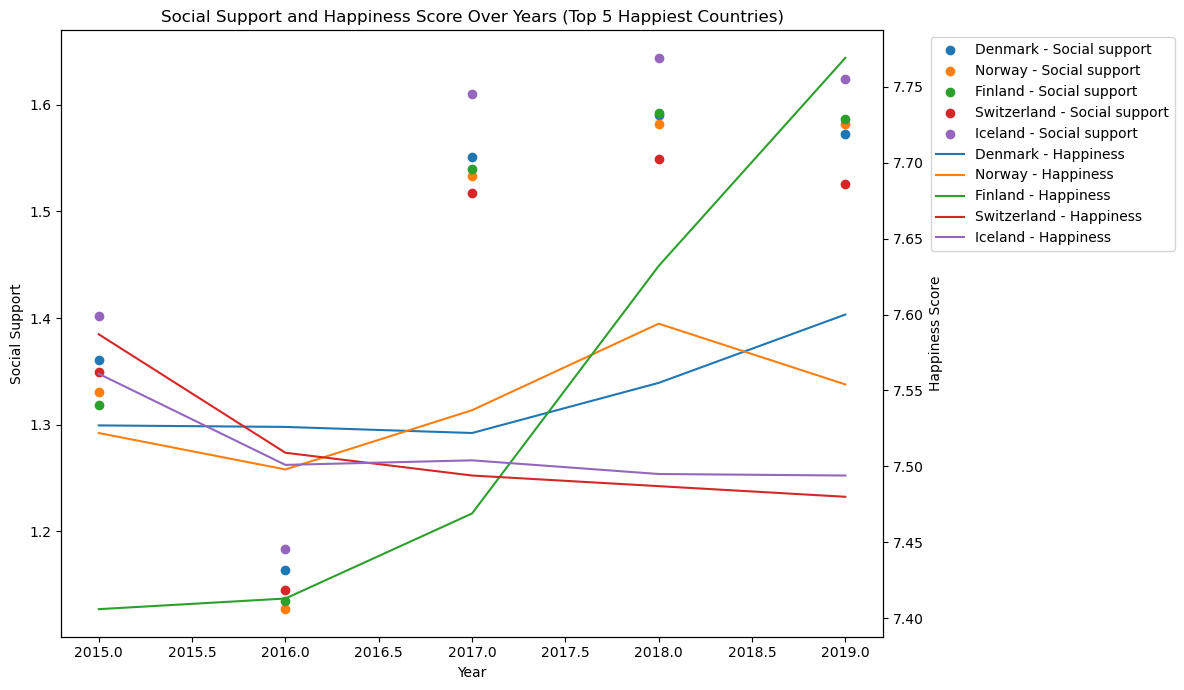

In [221]:
import matplotlib.pyplot as plt

# Step 1: Filter top 5 countries
top_5_countries = df.groupby('country')['happiness_score'].mean().nlargest(5).index
df_top5 = df[df['country'].isin(top_5_countries)]

# Step 2: Aggregate data by year and country for smoother lines (mean)
df_agg = df_top5.groupby(['year', 'country'])[['social_support', 'happiness_score']].mean().reset_index()

# Step 3: Plot dual-axis for each country separately (or combined if preferred)

fig, ax1 = plt.subplots(figsize=(12, 7))

colors = plt.cm.tab10.colors  # Up to 10 distinct colors


for i, country in enumerate(top_5_countries):
    country_data = df_agg[df_agg['country'] == country]
    ax1.scatter(country_data['year'], country_data['social_support'], color=colors[i], label=f'{country} - Social support')

    
ax1.set_xlabel('Year')
ax1.set_ylabel('Social Support')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()  # Create secondary y-axis

for i, country in enumerate(top_5_countries):
    country_data = df_agg[df_agg['country'] == country]
    ax2.plot(country_data['year'], country_data['happiness_score'], color=colors[i], label=f'{country} - Happiness')


ax2.set_ylabel('Happiness Score')
ax2.tick_params(axis='y', labelcolor='black')

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', bbox_to_anchor=(1.05, 1))

plt.title('Social Support and Happiness Score Over Years (Top 5 Happiest Countries)')
plt.tight_layout()
plt.show()

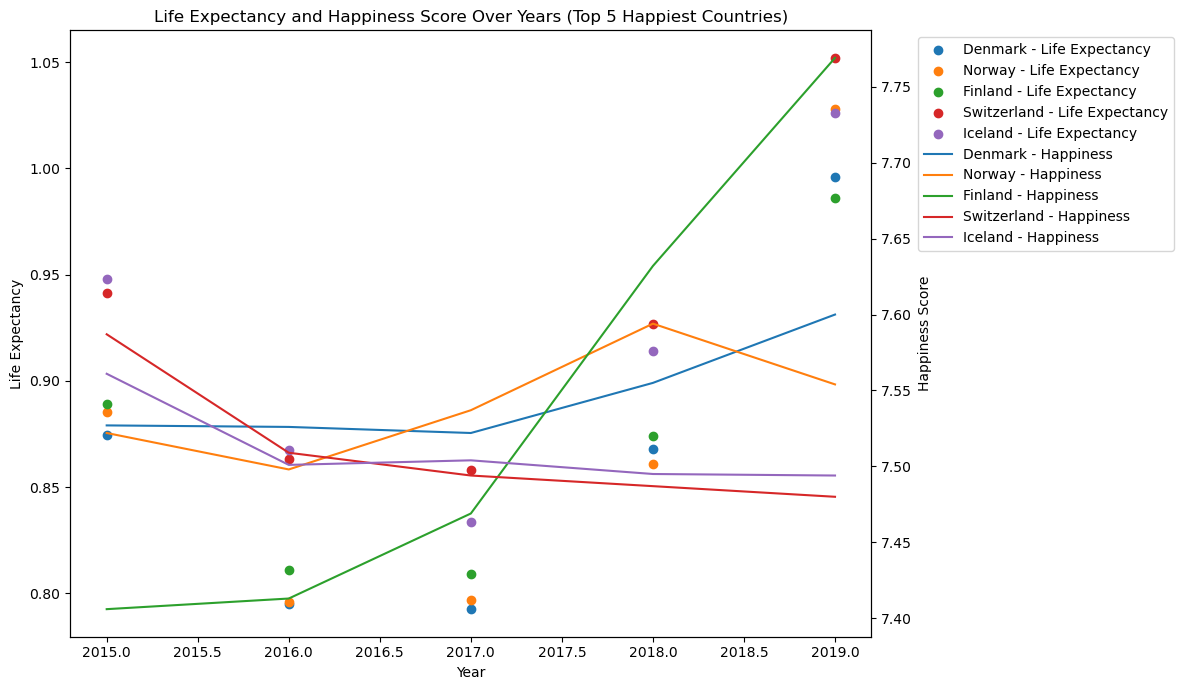

In [227]:
import matplotlib.pyplot as plt

# Step 1: Filter top 5 countries
top_5_countries = df.groupby('country')['happiness_score'].mean().nlargest(5).index
df_top5 = df[df['country'].isin(top_5_countries)]

# Step 2: Aggregate data by year and country for smoother lines (mean)
df_agg = df_top5.groupby(['year', 'country'])[['life_expectancy', 'happiness_score']].mean().reset_index()

# Step 3: Plot dual-axis for each country separately (or combined if preferred)

fig, ax1 = plt.subplots(figsize=(12, 7))

colors = plt.cm.tab10.colors  # Up to 10 distinct colors


for i, country in enumerate(top_5_countries):
    country_data = df_agg[df_agg['country'] == country]
    ax1.scatter(country_data['year'], country_data['life_expectancy'], color=colors[i], label=f'{country} - Life Expectancy')

    
ax1.set_xlabel('Year')
ax1.set_ylabel('Life Expectancy')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()  # Create secondary y-axis

for i, country in enumerate(top_5_countries):
    country_data = df_agg[df_agg['country'] == country]
    ax2.plot(country_data['year'], country_data['happiness_score'], color=colors[i], label=f'{country} - Happiness')


ax2.set_ylabel('Happiness Score')
ax2.tick_params(axis='y', labelcolor='black')

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', bbox_to_anchor=(1.05, 1))

plt.title('Life Expectancy and Happiness Score Over Years (Top 5 Happiest Countries)')
plt.tight_layout()
plt.show()

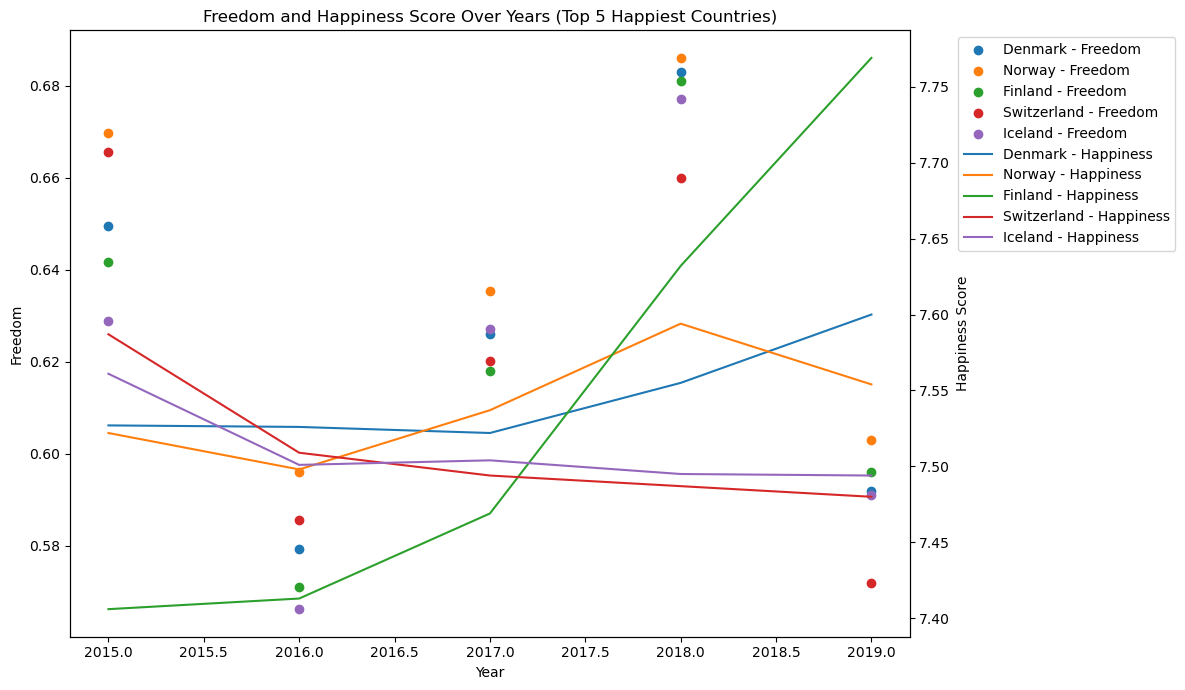

In [223]:
import matplotlib.pyplot as plt

# Step 1: Filter top 5 countries
top_5_countries = df.groupby('country')['happiness_score'].mean().nlargest(5).index
df_top5 = df[df['country'].isin(top_5_countries)]

# Step 2: Aggregate data by year and country for smoother lines (mean)
df_agg = df_top5.groupby(['year', 'country'])[['freedom', 'happiness_score']].mean().reset_index()

# Step 3: Plot dual-axis for each country separately (or combined if preferred)

fig, ax1 = plt.subplots(figsize=(12, 7))

colors = plt.cm.tab10.colors  # Up to 10 distinct colors


for i, country in enumerate(top_5_countries):
    country_data = df_agg[df_agg['country'] == country]
    ax1.scatter(country_data['year'], country_data['freedom'], color=colors[i], label=f'{country} - Freedom')

    
ax1.set_xlabel('Year')
ax1.set_ylabel('Freedom')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()  # Create secondary y-axis

for i, country in enumerate(top_5_countries):
    country_data = df_agg[df_agg['country'] == country]
    ax2.plot(country_data['year'], country_data['happiness_score'], color=colors[i], label=f'{country} - Happiness')


ax2.set_ylabel('Happiness Score')
ax2.tick_params(axis='y', labelcolor='black')

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', bbox_to_anchor=(1.05, 1))

plt.title('Freedom and Happiness Score Over Years (Top 5 Happiest Countries)')
plt.tight_layout()
plt.show()

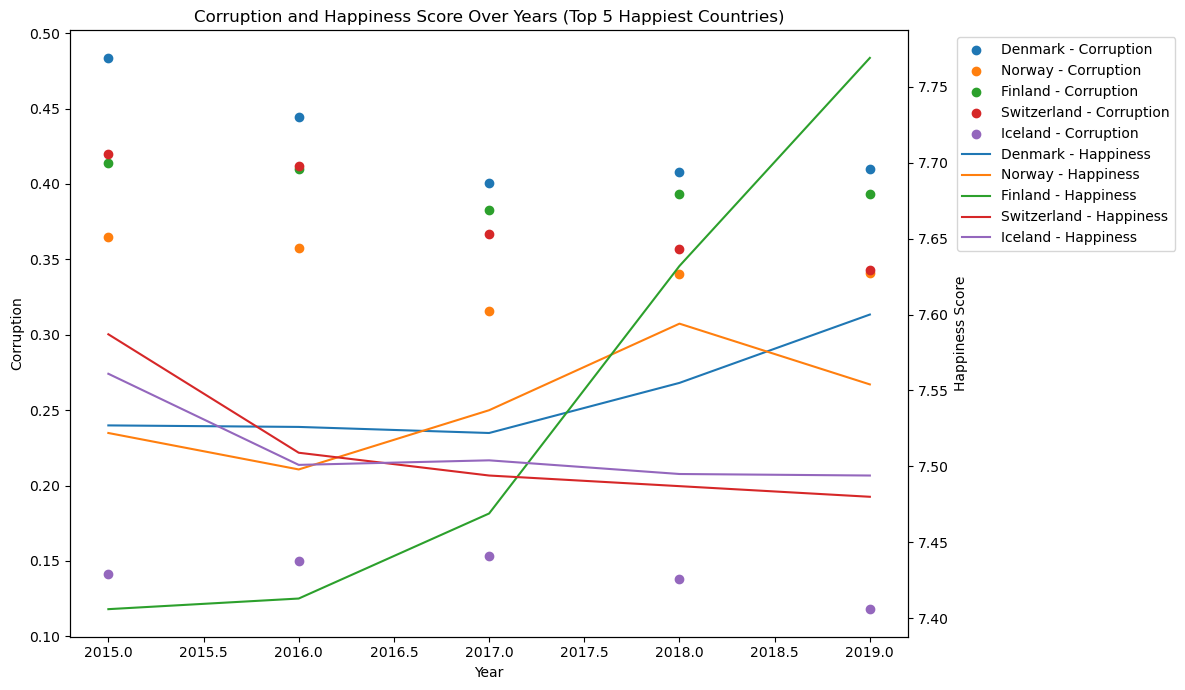

In [224]:
import matplotlib.pyplot as plt

# Step 1: Filter top 5 countries
top_5_countries = df.groupby('country')['happiness_score'].mean().nlargest(5).index
df_top5 = df[df['country'].isin(top_5_countries)]

# Step 2: Aggregate data by year and country for smoother lines (mean)
df_agg = df_top5.groupby(['year', 'country'])[['corruption', 'happiness_score']].mean().reset_index()

# Step 3: Plot dual-axis for each country separately (or combined if preferred)

fig, ax1 = plt.subplots(figsize=(12, 7))

colors = plt.cm.tab10.colors  # Up to 10 distinct colors


for i, country in enumerate(top_5_countries):
    country_data = df_agg[df_agg['country'] == country]
    ax1.scatter(country_data['year'], country_data['corruption'], color=colors[i], label=f'{country} - Corruption')

    
ax1.set_xlabel('Year')
ax1.set_ylabel('Corruption')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()  # Create secondary y-axis

for i, country in enumerate(top_5_countries):
    country_data = df_agg[df_agg['country'] == country]
    ax2.plot(country_data['year'], country_data['happiness_score'], color=colors[i], label=f'{country} - Happiness')


ax2.set_ylabel('Happiness Score')
ax2.tick_params(axis='y', labelcolor='black')

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', bbox_to_anchor=(1.05, 1))

plt.title('Corruption and Happiness Score Over Years (Top 5 Happiest Countries)')
plt.tight_layout()
plt.show()

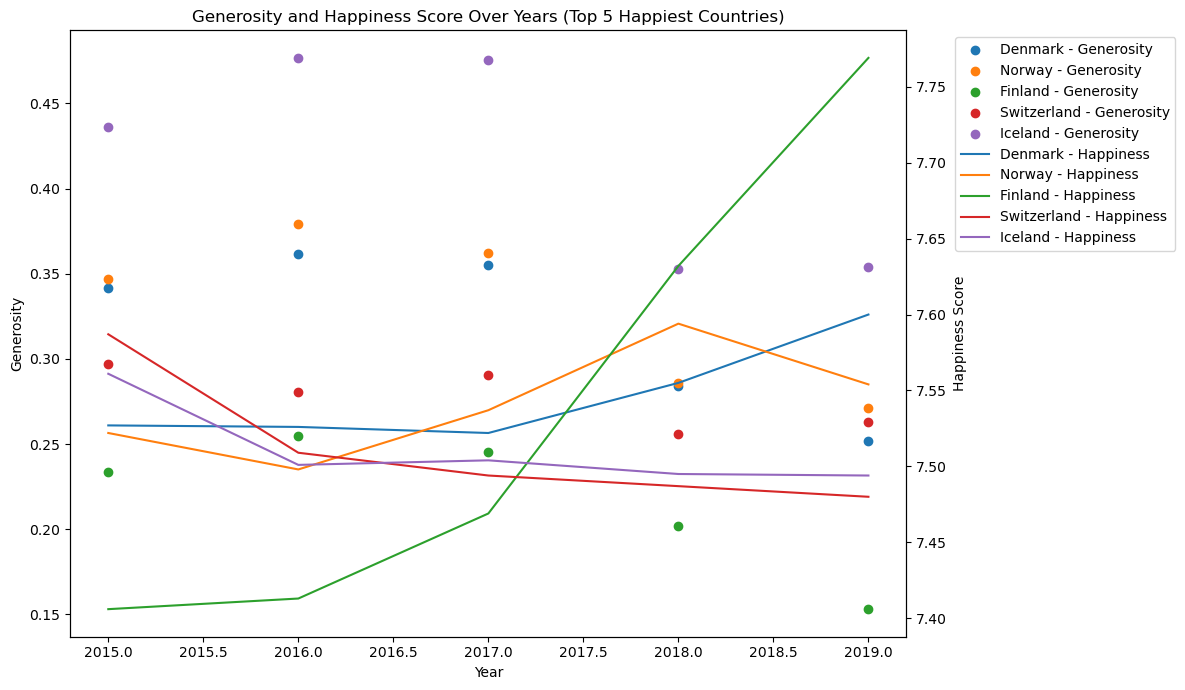

In [225]:
import matplotlib.pyplot as plt

# Step 1: Filter top 5 countries
top_5_countries = df.groupby('country')['happiness_score'].mean().nlargest(5).index
df_top5 = df[df['country'].isin(top_5_countries)]

# Step 2: Aggregate data by year and country for smoother lines (mean)
df_agg = df_top5.groupby(['year', 'country'])[['generosity', 'happiness_score']].mean().reset_index()

# Step 3: Plot dual-axis for each country separately (or combined if preferred)

fig, ax1 = plt.subplots(figsize=(12, 7))

colors = plt.cm.tab10.colors  # Up to 10 distinct colors


for i, country in enumerate(top_5_countries):
    country_data = df_agg[df_agg['country'] == country]
    ax1.scatter(country_data['year'], country_data['generosity'], color=colors[i], label=f'{country} - Generosity')

    
ax1.set_xlabel('Year')
ax1.set_ylabel('Generosity')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()  # Create secondary y-axis

for i, country in enumerate(top_5_countries):
    country_data = df_agg[df_agg['country'] == country]
    ax2.plot(country_data['year'], country_data['happiness_score'], color=colors[i], label=f'{country} - Happiness')


ax2.set_ylabel('Happiness Score')
ax2.tick_params(axis='y', labelcolor='black')

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', bbox_to_anchor=(1.05, 1))

plt.title('Generosity and Happiness Score Over Years (Top 5 Happiest Countries)')
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/seaborn/regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.poly

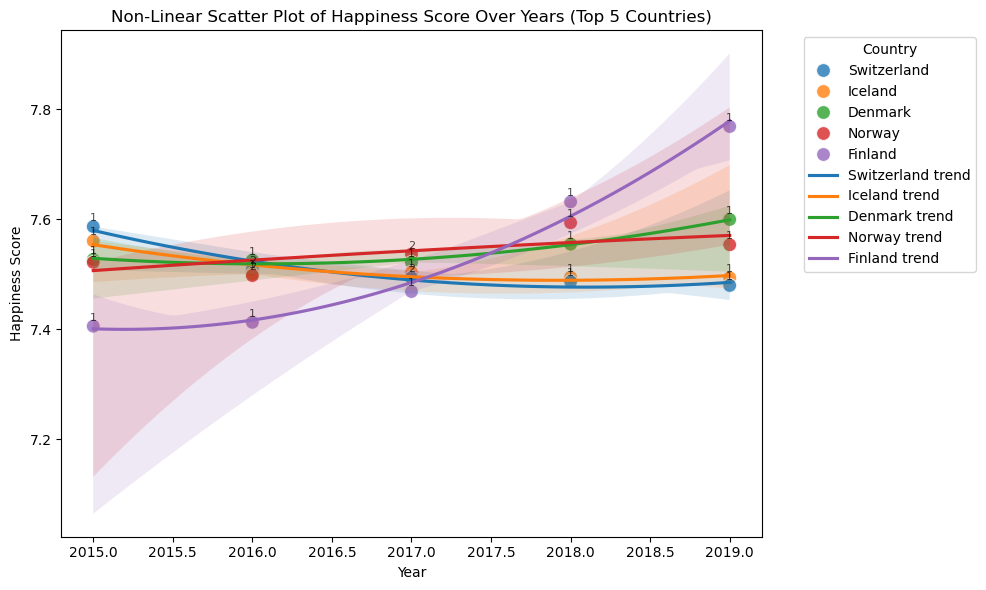

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Scatter plot for happiness score vs year
sns.scatterplot(data=df_top5, x='year', y='happiness_score', hue='country', s=100, alpha=0.8)

# Optional: Add non-linear regression lines (e.g., 2nd-order polynomial for trend)
for country in df_top5['country'].unique():
    country_data = df_top5[df_top5['country'] == country]
    sns.regplot(
        data=country_data,
        x='year',
        y='happiness_score',
        scatter=False,
        order=2,   # Non-linear polynomial of degree 2
        label=f"{country} trend",
        truncate=True
    )

# Add GDP annotations
for i in range(len(df_top5)):
    year = df_top5.iloc[i]['year']
    score = df_top5.iloc[i]['happiness_score']
    gdp = df_top5.iloc[i]['gdp']
    country = df_top5.iloc[i]['country']
    
    plt.text(year, score + 0.01, f"{gdp:,.0f}", fontsize=8, ha='center', alpha=0.7)

# Titles and labels
plt.title("Non-Linear Scatter Plot of Happiness Score Over Years (Top 5 Countries)")
plt.xlabel("Year")
plt.ylabel("Happiness Score")
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [228]:
import pandas as pd

# Load external mapping file
df_region = pd.read_csv('2015.csv')  # contains 'Country' and 'Region' columns

# Standardize columns names (lowercase and strip)
df_region.columns = df_region.columns.str.lower().str.strip()
df.columns = df.columns.str.lower().str.strip()

In [229]:
# Rename region column in mapping df before merge to avoid clash
df_region = df_region.rename(columns={'region': 'region_merged'})

In [230]:
# Merge the mapping info on 'country'
df = df.merge(df_region[['country', 'region_merged']], on='country', how='left')

In [231]:
# Fill missing 'region' values with those from 'region_mapped'
df['region'] = df['region'].fillna(df['region_merged'])

In [232]:
# Fill 'Unknown' region values with mapped values
df.loc[df['region'] == 'Unknown', 'region'] = df.loc[df['region'] == 'Unknown', 'region_merged']

In [233]:
(df['region']=='Unknown').sum()

0

In [235]:
df = df.dropna(subset=['region'])

In [236]:
df

,country,region,year,happiness_score,gdp,social_support,life_expectancy,freedom,corruption,generosity,happiness_level,region_merged
0,Switzerland,Western Europe,2015,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,Happy,Western Europe
1,Iceland,Western Europe,2015,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,Happy,Western Europe
2,Denmark,Western Europe,2015,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,Happy,Western Europe
3,Norway,Western Europe,2015,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,Happy,Western Europe
4,Canada,North America,2015,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,Happy,North America
...,...,...,...,...,...,...,...,...,...,...,...,...
776,Yemen,Middle East and Northern Africa,2019,3.380,0.28700,1.16300,0.46300,0.14300,0.07700,0.10800,Unhappy,Middle East and Northern Africa
777,Rwanda,Sub-Saharan Africa,2019,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,Unhappy,Sub-Saharan Africa
778,Tanzania,Sub-Saharan Africa,2019,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,Unhappy,Sub-Saharan Africa
779,Afghanistan,Southern Asia,2019,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,Unhappy,Southern Asia


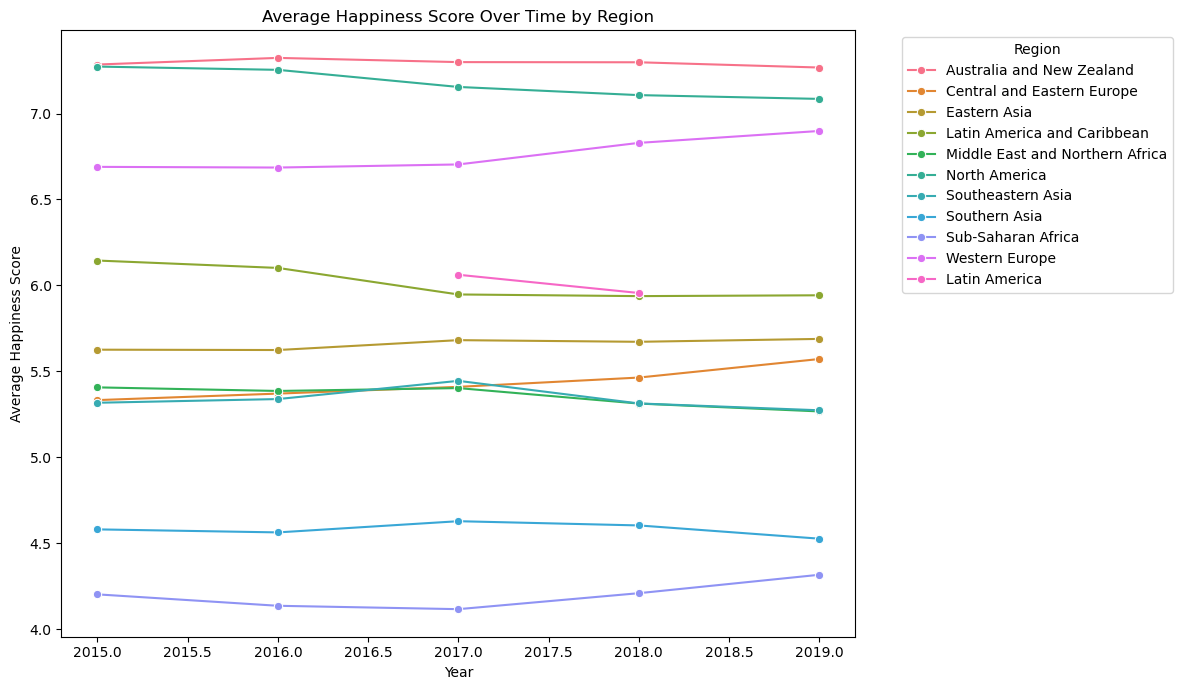

In [237]:
# Group by year and region
avg_by_region_year = df.groupby(['year', 'region'])['happiness_score'].mean().reset_index()

# Line plot: One line per region
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
sns.lineplot(data=avg_by_region_year, x='year', y='happiness_score', hue='region', marker='o')

plt.title('Average Happiness Score Over Time by Region')
plt.xlabel('Year')
plt.ylabel('Average Happiness Score')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/var/folders/9h/47m7r7s90_g8yb96thpzxb0h0000gn/T/ipykernel_14812/3248503593.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corruption_corr = df.groupby('region').apply(
/var/folders/9h/47m7r7s90_g8yb96thpzxb0h0000gn/T/ipykernel_14812/3248503593.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=corruption_corr, x='correlation', y='region', palette='coolwarm', orient='h')


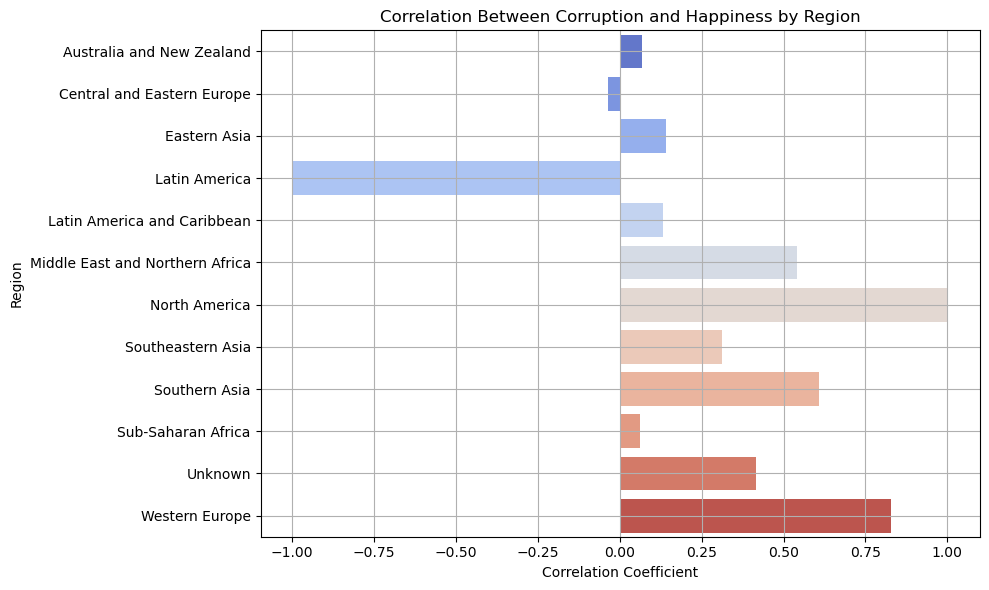

In [42]:
# Compute correlation between Corruption and Happiness per region
corruption_corr = df.groupby('region').apply(
    lambda x: x['corruption'].corr(x['happiness_score'])
).reset_index(name='correlation')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=corruption_corr, x='correlation', y='region', palette='coolwarm', orient='h')

plt.title('Correlation Between Corruption and Happiness by Region')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Region')
plt.grid(True)
plt.tight_layout()
plt.show()
